In [1]:
import struct
from PIL import Image, ImageEnhance
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, metrics, cross_validation
import skflow
import tensorflow as tf
%matplotlib inline
 
# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

from preprocessing.data_utils import get_ETL8B_data

In [2]:
W, H = 64, 64
new_img = Image.new('1', (W, H))

id_category = 0
dataset = 1
filename = 'ETLC/ETL8B/ETL8B2C'+str(dataset)

X = []
Y = []
with open(filename, 'r') as f:
    f.seek((id_category * 160 + 1) * 512)
    for i in range(160):
        try:
            r = read_record_ETL8B2(f)
            new_img.paste(r[-1], (0,0))    
            iI = Image.eval(new_img, lambda x: not x)

            X.append(np.asarray(new_img.getdata()).reshape(W,H))
            Y.append(r[1])
        except:
            break

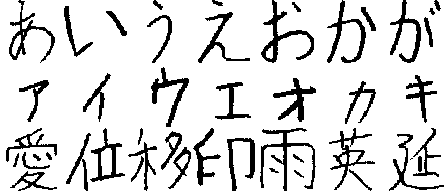

In [40]:
nsamples = 7
characters_picture, labels_picture = get_ETL8B_data(1, range(0,nsamples,1), 1, 
                                                    starting_writer=1,
                                                    img_format=True)
          
chars, labs2 = get_ETL8B_data('07', range(0,nsamples), 1,
                             database='ETL1C',
                             starting_writer=700,
                             img_format=True)
for char in chars:
    characters_picture += [char]


chars, labs = get_ETL8B_data(1, np.arange(75,400,7), 1,
                             starting_writer=40,
                             img_format=True)
for char in chars:
    characters_picture += [char]

figure = Image.new('1', (64*nsamples, 64*3))
for i, picture in enumerate(characters_picture):
    figure.paste(picture, (64*(i%nsamples), 64*(i/nsamples)))

figure.save('milestone_report/figure1.png', 'PNG')
figure

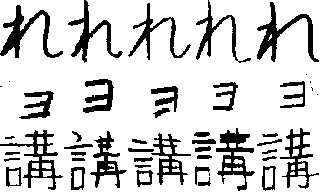

In [223]:
nsamples = 5
characters_picture, labels_picture = get_ETL8B_data(1, [70], nsamples, 
                                                    starting_writer=1,
                                                    img_format=True)
chars, labs2 = get_ETL8B_data('11', [8], nsamples,
                             database='ETL1C',
                             starting_writer=0,
                             img_format=True)
for char in chars:
    characters_picture += [char]
    
chars, labs = get_ETL8B_data(2, [31], nsamples,
                         starting_writer=1,
                         img_format=True)
for char in chars:
    characters_picture += [char]

figure = Image.new('1', (64*nsamples, 64*3))
for i, picture in enumerate(characters_picture):
    figure.paste(picture, (64*(i%nsamples), 64*(i/nsamples)))

figure.save('milestone_report/figure2.png', 'PNG')
figure

In [213]:
labs2

[221, 221]

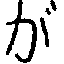

In [213]:
characters_picture[6]

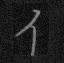

In [192]:
import PIL.ImageOps    
import cv2
# Katakana ETL1C_07 through 13
filename = 'ETLC/ETL1/ETL1C_07'
id_category = 2
with open(filename, 'r') as f:
    f.seek((id_category * 1410 + 1) * 2052)
    s = f.read(2052)
    r = struct.unpack('>H2sH6BI4H4B4x2016s4x', s)
    iF = Image.frombytes('F', (64, 63), r[18], 'bit', 4)
    iP = iF.convert('P')
#     fn = "{:1d}{:4d}{:2x}.png".format(r[0], r[2], r[3])
    # iP.save(fn, 'PNG', bits=4)
    enhancer = ImageEnhance.Brightness(iP)
    iE = enhancer.enhance(16)
    
#     iE.save(fn, 'PNG')
iE

In [ ]:
filename = 'ETL8G/ETL8G_01'
id_dataset = 0
new_img = Image.new('L', (128*23, 128*30))

with open(filename, 'r') as f:
    f.seek(id_dataset * 956 * sz_)

In [224]:
new_img.thumbnail((32,32), Image.ANTIALIAS)
new_img
np.asarray(new_img.getdata()).reshape(32,32)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

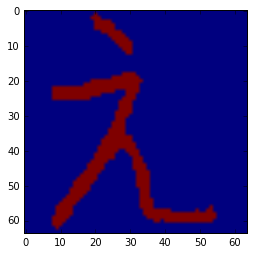

In [16]:
# 1+51200 records
# 320 categories
# 160 writers per category
# X_small, Y_small = get_ETL8B_data(1, 10, 20, resize=(32,32))
X_small, Y_small = get_ETL8B_data(1, range(0,75), 1)
imshow(-X_small[3])

In [168]:
# Load dataset.
# Hiragana data set with subset of writers
characters, labels = get_ETL8B_data(1, range(0,300), 160, vectorize=True, resize=(28,28))

for dataset in range(7,14):
    if dataset < 10:
        dataset = '0'+str(dataset)
    chars, labs = get_ETL8B_data(dataset, range(0,8), 160, database='ETL1C', vectorize=True, resize=(28,28))
    
    characters = np.concatenate((characters,chars), axis=0)
    labels = np.concatenate((labels,labs), axis=0)

# rename labels from 0 to n_labels-1
unique_labels = list(set(labels))
labels_dict = {unique_labels[i]:i for i in range(len(unique_labels))}
new_labels = np.array([labels_dict[l] for l in labels], dtype=np.int32)

from sklearn.utils import shuffle
characters_shuffle, new_labels_shuffle = shuffle(characters, new_labels, random_state=0)

X_train, X_test, y_train, y_test = cross_validation.train_test_split(characters_shuffle,
                                                                     new_labels_shuffle,
                                                                     test_size=0.3,
                                                                     random_state=42)

In [169]:
# confirm data type and shapes
print characters_shuffle.shape
print type(X_train[0,0]), type(y_train[0])
print X_train.shape, y_train.shape

(56162, 784)
<type 'numpy.int32'> <type 'numpy.int32'>
(39313, 784) (39313,)


In [96]:
def exp_decay(global_step):
    return tf.train.exponential_decay(0.1, global_step, 100, 0.50)

In [170]:
# Start with a DNN and try to overfit
n_classes = len(set(labels))
classifier = skflow.TensorFlowDNNClassifier(hidden_units=[500,500,500],
                                            n_classes=n_classes,
                                            steps=10000,
#                                             learning_rate=exp_decay,
                                           )

# Fit and predict.
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_train)
score = metrics.accuracy_score(y_train, y_pred)
print('Accuracy: {0:f}'.format(score))

Step #1, avg. loss: 5.99664
Step #1001, avg. loss: 5.07063
Step #2001, epoch #1, avg. loss: 2.76121
Step #3001, epoch #2, avg. loss: 1.86523
Step #4001, epoch #3, avg. loss: 1.45846
Step #5001, epoch #4, avg. loss: 1.18731
Step #6001, epoch #4, avg. loss: 0.98884
Step #7001, epoch #5, avg. loss: 0.82978
Step #8001, epoch #6, avg. loss: 0.72041
Step #9001, epoch #7, avg. loss: 0.63975
Accuracy: 0.827284


In [171]:
y_pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {0:f}'.format(score))

Accuracy: 0.718144


In [174]:
def max_pool_2x2(tensor_in):
    return tf.nn.max_pool(tensor_in,
                          ksize=[1, 2, 2, 1],
                          strides=[1, 2, 2, 1],
                          padding='SAME')

def conv_model(X, y):
    # reshape X to 4d tensor with 2nd and 3rd dimensions being image width and height
    # final dimension being the number of color channels
    X = tf.reshape(X, [-1, 28, 28, 1])
    # first conv layer will compute 32 features for each 5x5 patch
    with tf.variable_scope('conv_layer1'):
        h_conv1 = skflow.ops.conv2d(X, n_filters=64, filter_shape=[5, 5], 
                                    bias=True, activation=tf.nn.relu)
        h_pool1 = max_pool_2x2(h_conv1)
    # second conv layer will compute 64 features for each 5x5 patch
    with tf.variable_scope('conv_layer2'):
        h_conv2 = skflow.ops.conv2d(h_pool1, n_filters=64, filter_shape=[5, 5], 
                                    bias=True, activation=tf.nn.relu)
        h_pool2 = max_pool_2x2(h_conv2)
        # reshape tensor into a batch of vectors
        h_pool2_flat = tf.reshape(h_pool2, [-1, 7 * 7 * 64])
    # densely connected layer with 1024 neurons
    h_fc1 = skflow.ops.dnn(h_pool2_flat, [1024], activation=tf.nn.relu, keep_prob=0.5)
    return skflow.models.logistic_regression(h_fc1, y)

In [224]:
# Training and predicting
def exp_decay(global_step):
    return tf.train.exponential_decay(0.1, global_step, 200, 0.76)
n_classes = len(set(labels))
classifier = skflow.TensorFlowEstimator(model_fn=conv_model,
                                        n_classes=n_classes,
                                        batch_size=100,
                                        steps=20000,
                                        learning_rate=exp_decay)
# Fit and predict.
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {0:f}'.format(score))

Step #1, avg. loss: 6.68018
Step #2001, epoch #5, avg. loss: 1.63608
Step #4001, epoch #10, avg. loss: 0.27099
Step #6001, epoch #15, avg. loss: 0.24195
Step #8001, epoch #20, avg. loss: 0.24066
Step #10001, epoch #25, avg. loss: 0.23894
Step #12001, epoch #30, avg. loss: 0.23957
Step #14001, epoch #35, avg. loss: 0.23993
Step #16001, epoch #40, avg. loss: 0.24020
Step #18001, epoch #45, avg. loss: 0.23947


KeyboardInterrupt: 

In [ ]:
y_pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {0:f}'.format(score))